# Analysis of the rankings obtained in the tags_ask_ubuntu hypergraph

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import scienceplots

plt.style.use(['science', 'no-latex'])

from collections import defaultdict

In [2]:
df = pandas.read_csv("Output/tags_ask_ubuntu_dataframe.csv")

In [3]:
df

,CEC,UPHEC-2,UPHEC-3,UPHEC-4,UPHEC-5,HEC-2unif,HEC-3unif,HEC-4unif,HEC-5unif,AltUnif-3,AltUnif-4,AltUnif-5
0,2.306073e-03,0.001484,0.001084,0.000875,0.000719,0.001732,0.001297,0.001102,0.001049,0.001095,0.000903,0.000682
1,6.054255e-04,0.000809,0.000653,0.000577,0.000528,0.001214,0.000900,0.000622,0.000604,0.000652,0.000589,0.000563
2,2.185869e-03,0.001456,0.001006,0.000799,0.000684,0.002811,0.001778,0.001147,0.000838,0.001005,0.000805,0.000758
3,5.131390e-03,0.002170,0.001297,0.000966,0.000794,0.004494,0.002335,0.001402,0.001039,0.001300,0.000986,0.000905
4,1.058603e-04,0.000344,0.000377,0.000375,0.000375,0.000262,0.000387,0.000422,0.000357,0.000376,0.000368,0.000378
...,...,...,...,...,...,...,...,...,...,...,...,...
3016,2.536752e-06,0.000045,0.000068,0.000107,0.000153,0.000012,0.000061,0.000000,0.000000,0.000057,0.000094,0.000169
3017,5.530844e-07,0.000032,0.000071,0.000091,0.000132,0.000000,0.000000,0.000073,0.000000,0.000072,0.000062,0.000097
3018,2.485267e-07,0.000024,0.000044,0.000078,0.000122,0.000000,0.000030,0.000000,0.000000,0.000035,0.000059,0.000113
3019,2.320683e-07,0.000028,0.000063,0.000087,0.000130,0.000000,0.000000,0.000074,0.000000,0.000064,0.000058,0.000103


In [4]:
df.sum() # consistency check

CEC          1.0
UPHEC-2      1.0
UPHEC-3      1.0
UPHEC-4      1.0
UPHEC-5      1.0
HEC-2unif    1.0
HEC-3unif    1.0
HEC-4unif    1.0
HEC-5unif    1.0
AltUnif-3    1.0
AltUnif-4    1.0
AltUnif-5    1.0
dtype: float64

## Complete ranking - Kendall's tau

In [5]:
KT = np.zeros((len(df.columns),len(df.columns)))
for i, row in enumerate(df):
    for j, col in enumerate(df):
        KT[i,j] = scipy.stats.kendalltau(df[row],df[col]).statistic

In [6]:
np.min(KT)

0.5453920196877984

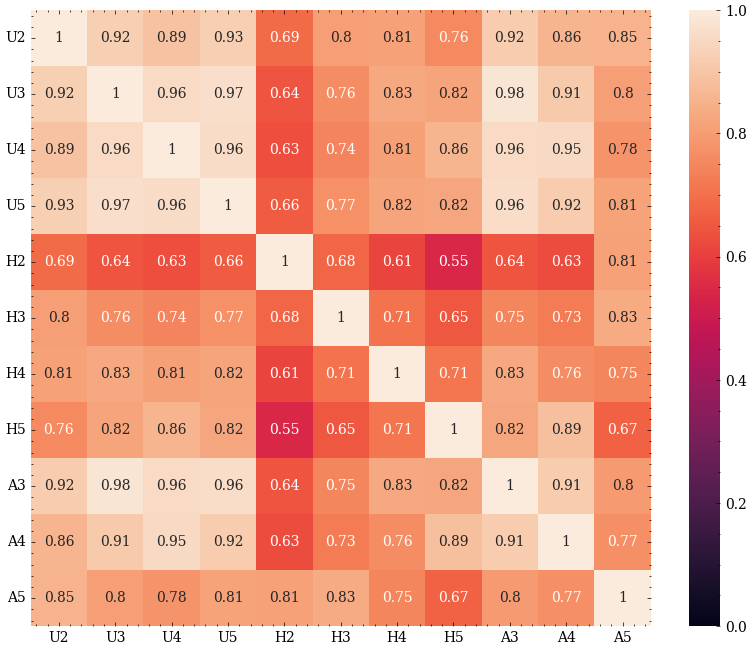

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax = sns.heatmap(KT[1:,1:], annot=True, vmin=0, vmax=1)

labels = ['U2','U3','U4','U5','H2','H3','H4','H5','A3','A4','A5'] #df.columns

ax.set_yticklabels(labels, rotation=0)
ax.set_xticklabels(labels, rotation=0)

plt.savefig("Figures/KT_heatmap.svg")

plt.show()

## Top-K ranking


In [8]:
## Top K nodes based on a centrality dictionary ##
def topK(cent, K=None, return_list=False):
    """
    Given a dictionary node-centrality score, return the top K ranking
    """

    if not K:
        K = len(cent)
    
    C = sorted(cent, key=cent.get, reverse=True)[:K]
    ranking = {key: cent[key] for key in C}
    
    if return_list:
        return C

    return ranking

In [9]:
dictlist = df.to_dict()

In [10]:
for key1, value1 in dictlist.items():
    print(key1, topK(value1,K=10).keys())

CEC dict_keys([1729, 88, 1163, 121, 152, 159, 1738, 137, 8, 314])
UPHEC-2 dict_keys([1729, 1163, 88, 1738, 121, 159, 152, 8, 137, 154])
UPHEC-3 dict_keys([1729, 88, 121, 152, 1163, 1738, 159, 137, 154, 136])
UPHEC-4 dict_keys([88, 1729, 152, 121, 1163, 137, 1738, 159, 154, 136])
UPHEC-5 dict_keys([1729, 88, 152, 121, 1163, 1738, 137, 159, 154, 136])
HEC-2unif dict_keys([1729, 1163, 1738, 52, 822, 3, 280, 8, 288, 1918])
HEC-3unif dict_keys([1729, 1163, 88, 1738, 52, 8, 288, 159, 280, 6])
HEC-4unif dict_keys([88, 1729, 1163, 152, 121, 137, 1738, 159, 136, 314])
HEC-5unif dict_keys([88, 152, 137, 121, 1729, 136, 154, 1738, 1163, 159])
AltUnif-3 dict_keys([1729, 88, 121, 152, 1163, 1738, 159, 137, 154, 136])
AltUnif-4 dict_keys([88, 1729, 152, 121, 137, 1738, 1163, 159, 154, 136])
AltUnif-5 dict_keys([1729, 1163, 1738, 88, 52, 159, 8, 288, 280, 127])


In [11]:
KTtopK = defaultdict(list)

for key1, value1 in dictlist.items():
    
    print("Comparing", key1, "against the rest.")
    
    for key2, value2 in dictlist.items():
        
        if key1 == key2:
            continue
        
        for k in range(1, len(df)):
                        
            topk1 = topK(value1, K=k)
            centrals2 = [value2[node] for node in topk1.keys()]
            
            KTtopK[key1 + " -> " + key2].append( scipy.stats.kendalltau(list(topk1.values()), centrals2).statistic )

Comparing CEC against the rest.
Comparing UPHEC-2 against the rest.
Comparing UPHEC-3 against the rest.
Comparing UPHEC-4 against the rest.
Comparing UPHEC-5 against the rest.
Comparing HEC-2unif against the rest.
Comparing HEC-3unif against the rest.
Comparing HEC-4unif against the rest.
Comparing HEC-5unif against the rest.
Comparing AltUnif-3 against the rest.
Comparing AltUnif-4 against the rest.
Comparing AltUnif-5 against the rest.


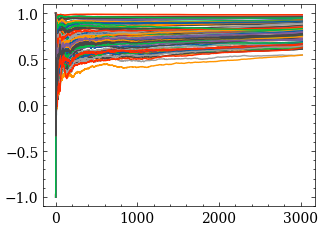

In [12]:
for key, val in KTtopK.items():
    plt.plot(val, label=key)
    
#plt.legend()

## Separate plots per pairwise comparison

In [13]:
# Colormap for the plots
cmap = plt.get_cmap('rainbow') #rainbow, hsv, viridis, cool

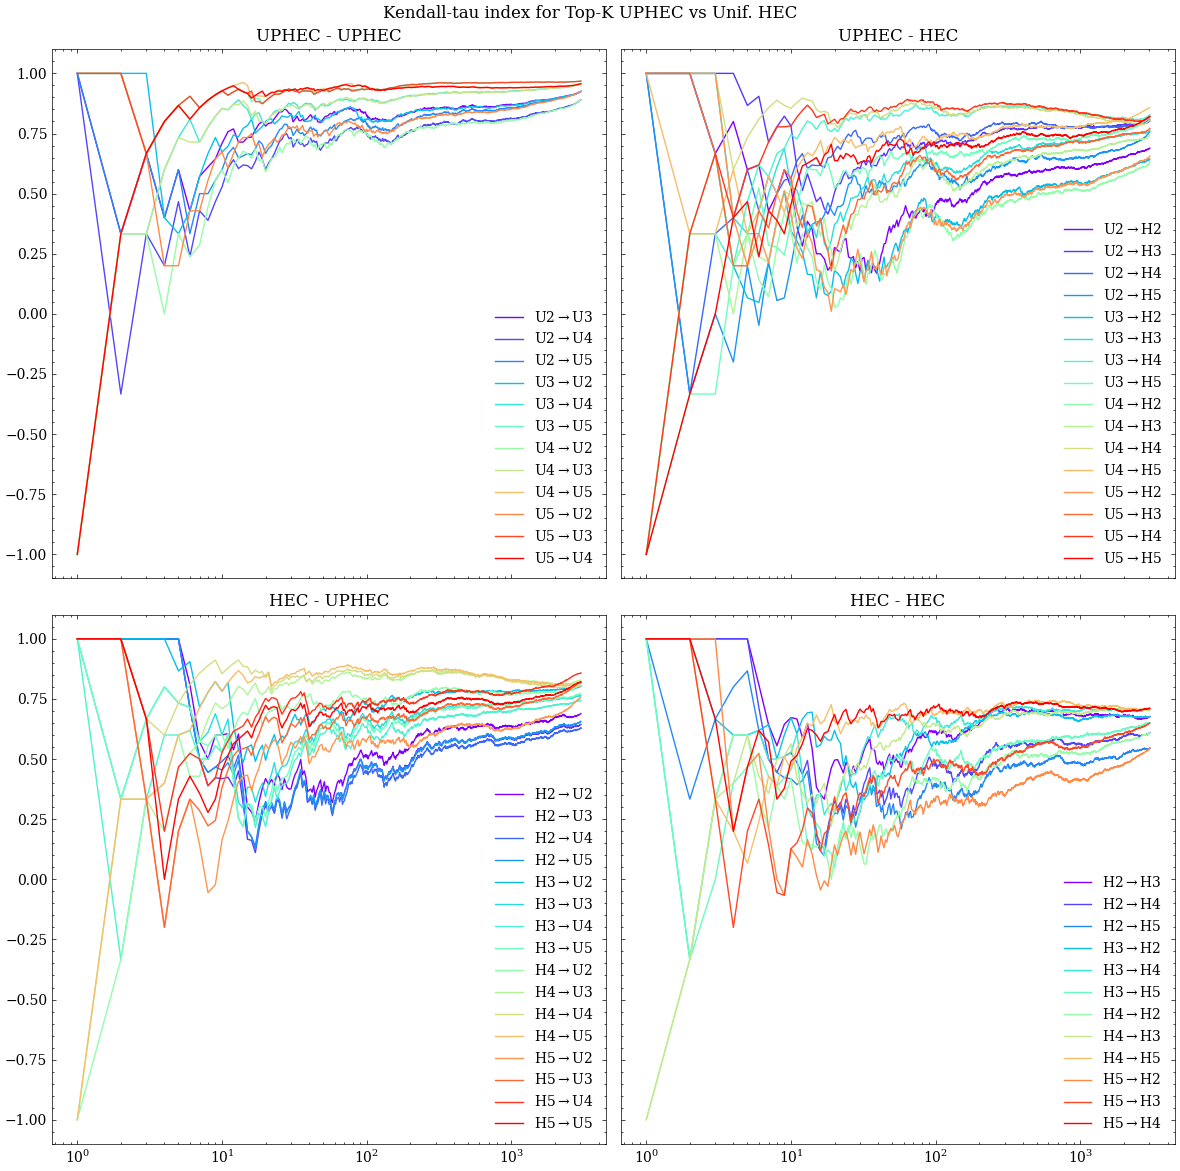

In [14]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
# Colormap for the plots
cmap = plt.get_cmap('rainbow') #rainbow, hsv, viridis, cool
fig.suptitle("Kendall-tau index for Top-K UPHEC vs Unif. HEC")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUH = iter(cmap(np.linspace(0, 1, 4*4)))
colorHU = iter(cmap(np.linspace(0, 1, 4*4)))
colorHH = iter(cmap(np.linspace(0, 1, 4*3)))

for key, val in KTtopK.items():
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        ax[0,1].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorUH))
        ax[0,1].set_title("UPHEC - HEC")
    
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        ax[1,0].plot(val, label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorHU))
        ax[1,0].set_title("HEC - UPHEC")
    
    elif "unif" in key[0:9] and "unif" in key[-5:]:
        
        ax[1,1].plot(val, label=f"H{key[4]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorHH))
        ax[1,1].set_title("HEC - HEC")
        

ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')

        
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()

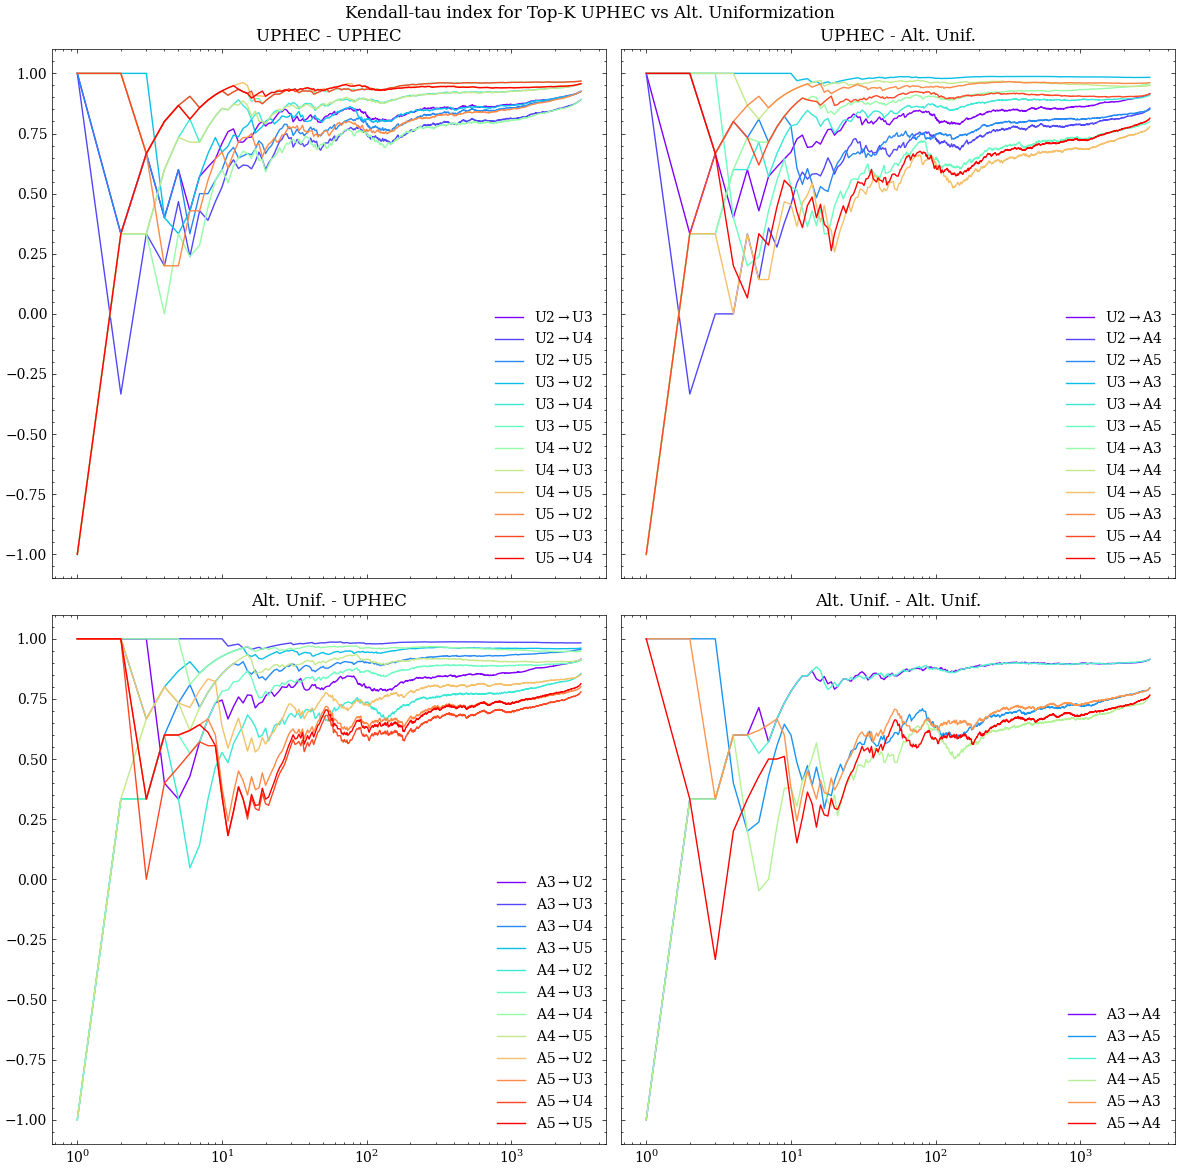

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUA = iter(cmap(np.linspace(0, 1, 4*3)))
colorAU = iter(cmap(np.linspace(0, 1, 4*3)))
colorAA = iter(cmap(np.linspace(0, 1, 2*3)))

for key, val in KTtopK.items():
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        ax[0,1].plot(val, label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorUA))
        ax[0,1].set_title("UPHEC - Alt. Unif.")
    
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        ax[1,0].plot(val, label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorAU))
        ax[1,0].set_title("Alt. Unif. - UPHEC")
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:
        
        ax[1,1].plot(val, label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorAA))
        ax[1,1].set_title("Alt. Unif. - Alt. Unif.")
        
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')


ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

plt.tight_layout()

plt.show()

## 2x3 grid figure

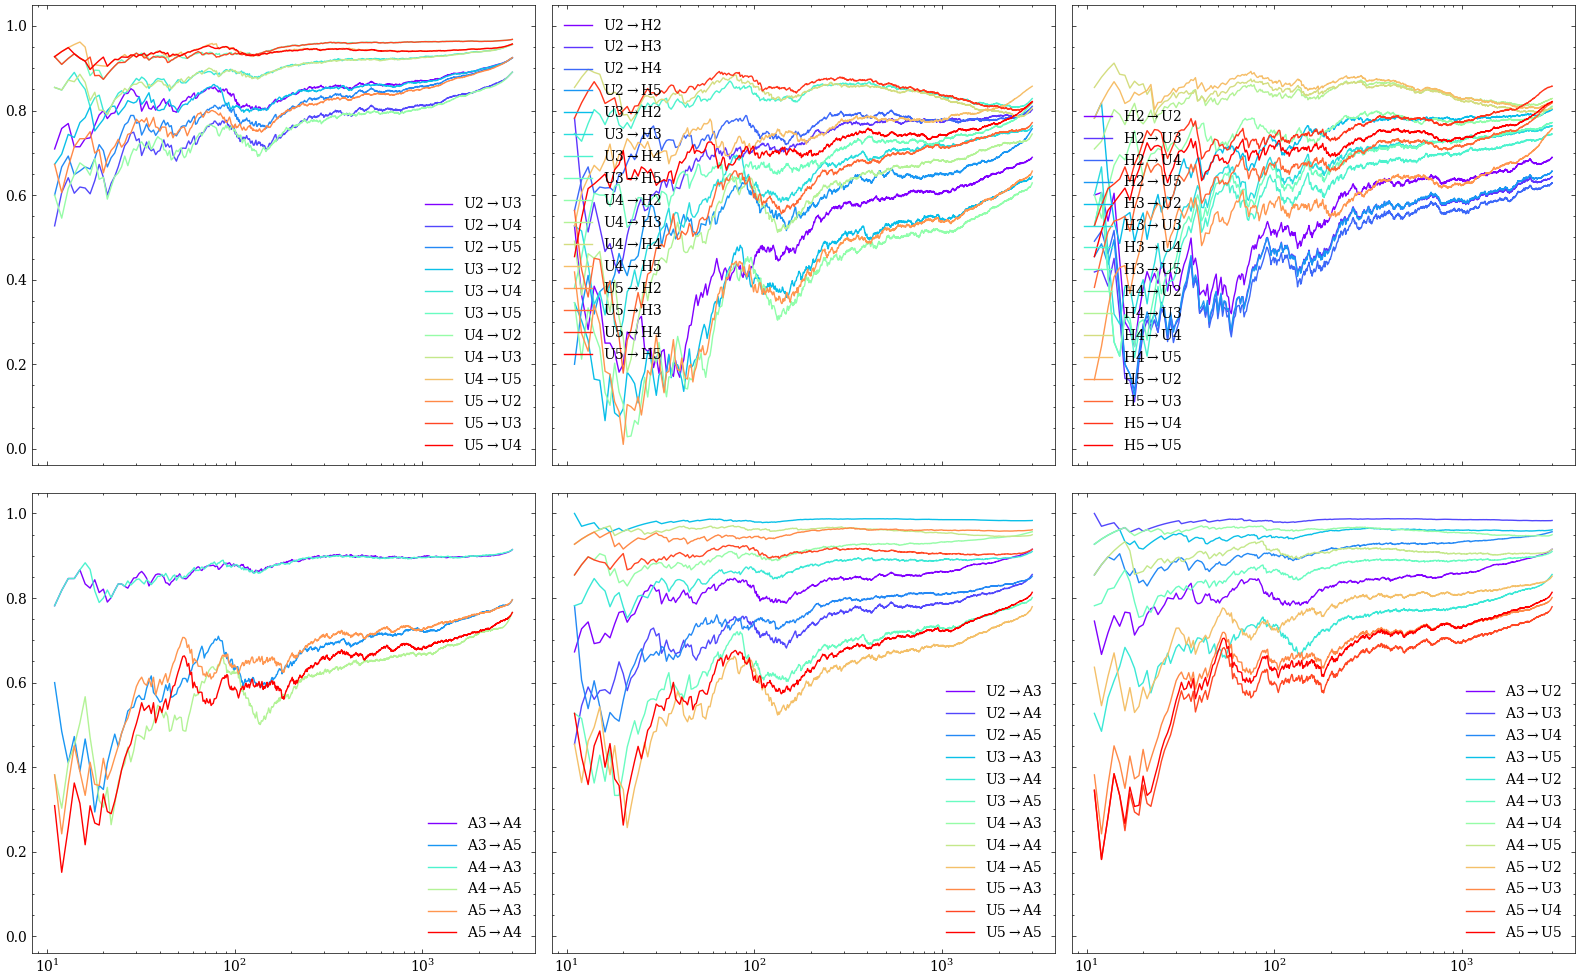

In [16]:
fig, ax = plt.subplots(2,3, figsize=(16,10), sharex=True, sharey=True)

#fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

colorUU = iter(cmap(np.linspace(0, 1, 4*3)))
colorUH = iter(cmap(np.linspace(0, 1, 4*4)))
colorHU = iter(cmap(np.linspace(0, 1, 4*4)))

colorAA = iter(cmap(np.linspace(0, 1, 2*3)))
colorUA = iter(cmap(np.linspace(0, 1, 4*3)))
colorAU = iter(cmap(np.linspace(0, 1, 4*3)))

for key, val in KTtopK.items():
    
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        ax[0,0].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorUU))
        #ax[0,0].set_title("UPHEC - UPHEC")
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        ax[0,1].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}", color=next(colorUH))
        #ax[0,1].set_title("UPHEC - HEC")
    
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        ax[0,2].plot(range(11,len(df)), val[10:],
                     label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorHU))
        #ax[0,2].set_title("HEC - UPHEC")
    
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:
        
        ax[1,0].plot(range(11,len(df)), val[10:],
                     label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorAA))
        #ax[1,0].set_title("Alt. Unif. - Alt. Unif.")
    
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        ax[1,1].plot(range(11,len(df)), val[10:],
                     label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}", color=next(colorUA))
        #ax[1,1].set_title("UPHEC - Alt. Unif.")
    
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        ax[1,2].plot(range(11,len(df)), val[10:],
                     label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}", color=next(colorAU))
        #ax[1,2].set_title("Alt. Unif. - UPHEC")
        
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')


ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()

plt.tight_layout()

plt.savefig("Figures/KT_topK_comparisons.svg")

plt.show()

## Simplified, final figure

In [17]:
axisdict = {}
datadict = {}

for key, val in KTtopK.items():    
    
    if "UP" in key[0:3] and "UP" in key[-8:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (0,0)
        datadict[label] = val[10:]
    
    elif "UP" in key[0:3] and "unif" in key[-5:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"H{key[-5]}"
        axisdict[label] = (0,1)
        datadict[label] = val[10:]
        
    elif "unif" in key[0:9] and "UP" in key[-8:]:
        
        label=f"H{key[4]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (0,2)
        datadict[label] = val[10:]
        
    
    elif "Alt" in key[0:8] and "Alt" in key[-9:]:

        label=f"A{key[8]}" + r"$\rightarrow$"+ f"A{key[-1]}"
        axisdict[label] = (1,0)
        datadict[label] = val[10:]
        
    elif "UP" in key[0:3] and "Alt" in key[-9:]:
        
        label=f"U{key[6]}" + r"$\rightarrow$"+ f"A{key[-1]}"
        axisdict[label] = (1,1)
        datadict[label] = val[10:]
        
    elif "Alt" in key[0:8] and "UP" in key[-8:]:
        
        label=f"A{key[8]}" + r"$\rightarrow$"+ f"U{key[-1]}"
        axisdict[label] = (1,2)
        datadict[label] = val[10:]
        

In [18]:
maxs = {}
mins = {}
means = {}

for label, data in datadict.items():
    maxs[label] = max(data)
    mins[label] = min(data)
    means[label] = np.mean(data)

In [19]:
# Filter what to plot
labels_to_plot = set()
for axis in [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]:
    
    axlabels = [label for label in maxs.keys() if axisdict[label] == axis]
    
    maxax = [maxim for label, maxim in maxs.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[maxax.index(max(maxax))])
    
    minax = [minim for label, minim in mins.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[minax.index(min(minax))])
    
    meanax = [mean for label, mean in means.items() if axisdict[label] == axis]
    
    labels_to_plot.add(axlabels[meanax.index(max(meanax))])
    labels_to_plot.add(axlabels[meanax.index(min(meanax))])
    

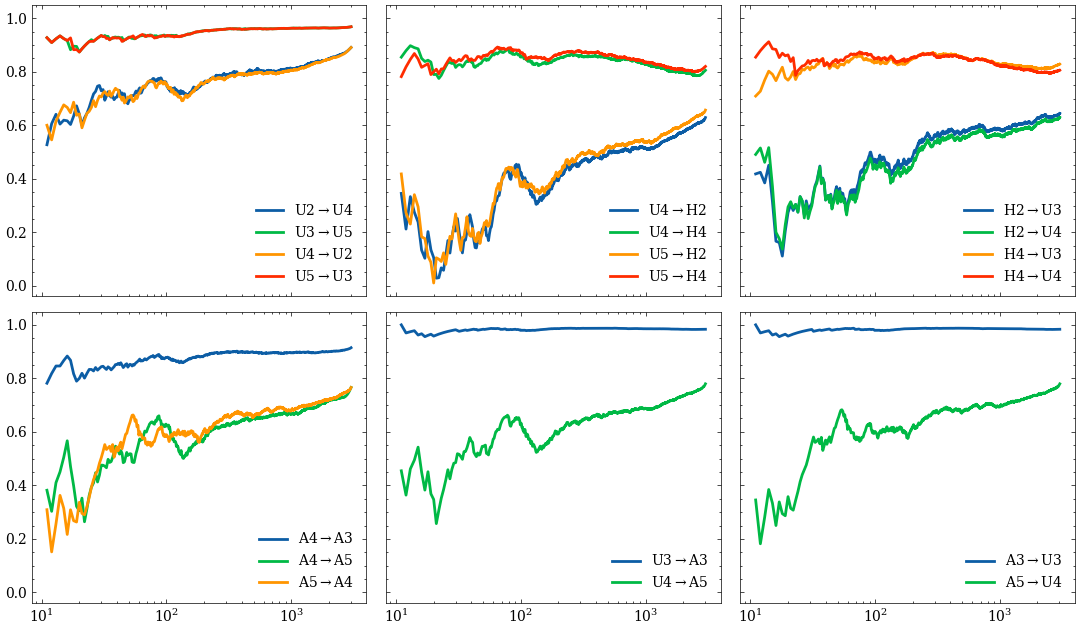

In [20]:
fig, ax = plt.subplots(2,3, figsize=(11,6.5), sharex=True, sharey=True)

#fig.suptitle("Kendall-tau index for Top-K UPHEC vs Alt. Uniformization")

for label, data in datadict.items():
    
    if label in labels_to_plot:
        ax[axisdict[label][0],axisdict[label][1]].plot(range(11,len(df)), data,
                                                       label=label, linewidth=2)
    
        
ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[0,2].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[1,2].set_xscale('log')


ax[0,0].legend(loc="lower right")
ax[0,1].legend(loc="lower right")
ax[0,2].legend(loc="lower right")
ax[1,0].legend(loc="lower right")
ax[1,1].legend(loc="lower right")
ax[1,2].legend(loc="lower right")

plt.tight_layout()

plt.savefig("Figures/KT_topK_comparisons_simple.svg")

plt.show()